# 🧪 Exploratory Data Analysis (EDA)

El objetivo de este análisis es **entender el dataset antes de realizar cualquier transformación o modelado**.
El EDA permite identificar patrones, detectar problemas en los datos y tomar decisiones informadas para la etapa de limpieza y preprocesamiento.

## 🎯 ¿Por qué hacemos EDA?

- Para **comprender la estructura de los datos** (tipos de variables, dimensiones, rangos).
- Para **evaluar la distribución del target** y detectar si el dataset está balanceado o desbalanceado.
- Para **identificar valores faltantes, inconsistencias y outliers** que luego serán corregidos en la etapa de limpieza.
- Para **explorar relaciones entre variables** y encontrar señales predictivas útiles para los modelos.
- Para **anotar decisiones de procesamiento** que se implementarán después en el pipeline real.

## 📌 Qué se realiza en esta sección

- Cargar el dataset original desde `data/raw`
- Revisar información general (`head`, `info`, `describe`)
- Analizar distribución del target (`HeartDisease`)
- Visualizar distribución de variables numéricas y categóricas
- Comparar features contra el target (e.g., Age vs HeartDisease)
- Crear un plan de limpieza y preprocesamiento basado en observaciones

⚠️ **En esta etapa NO se modifican datos**  
Solo observamos, analizamos y registramos conclusiones para luego aplicar limpieza estructurada en otro archivo/notebook.


In [1]:
# Ver de forma rápida las primeras filas del dataset
import os
import pandas as pd

# Traer el ultimo dataset guardado


# Obtener la lista de archivos en el directorio raw que comienzan con "df_original_v"
files = [f for f in os.listdir('../data/raw/') if f.startswith('df_original_v')]

# Ordenar los archivos para obtener el último
files.sort()

# Leer el último archivo
if files:
    latest_file = files[-1]
    data = pd.read_csv(f'../data/raw/{latest_file}')
else:
    data = pd.DataFrame()  # DataFrame vacío si no hay archivos

data.head(15)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [2]:
# Cantidad de nulos en cada columna
data.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [3]:
# Ver la distribución de la variable objetivo
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [4]:
# Ver si hay filas duplicadas
data.duplicated().sum()

np.int64(0)

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

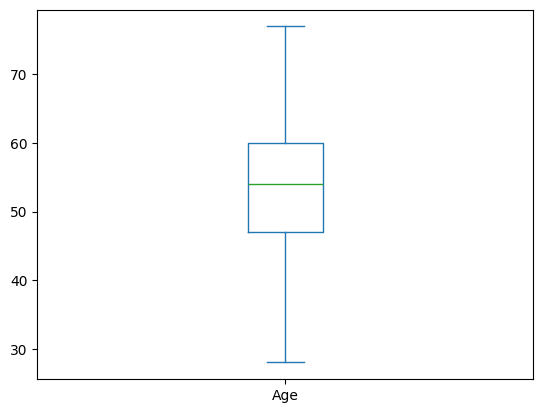

In [5]:
# Ver Outliers en la columna 'Age' (valores atípicos o inhumanos en este caso de datasetm, puede aplicarse a otras columnas como 'Cholesterol', 'RestingBP', etc.)
data['Age'].plot.box()
data['Age'].describe()


In [6]:
#Tipo de datos de cada columna
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

#Binarios (0/1): Heart
#Categoricos: Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina, ST_Slope
#Continuos: Age, RestingBP, Cholesterol, MaxHR, Oldpeak

In [7]:
# Features derived (crear nuevas columnas a partir de las existentes)
# A veces es importante por ejemplo en la edad agrupar en rangos o en niveles de colesterol ya que puede ayudar al modelo a identificar patrones más fácilmente
# Ayudamos al modelo a entender mejor los datos, diciendolé qué rangos o niveles son importantes
# Por ej, clinicamente se sabe que el colesterol en cierto rango es normal y en otros es riesgoso

data['Age_Range'] = pd.cut(data['Age'], bins=[29, 40, 55, 77], labels=['Young', 'Middle_Aged', 'Senior'])
data['Cholesterol_Level'] = pd.cut(data['Cholesterol'], bins=[0, 200, 240, 600], labels=['Desirable', 'Borderline High', 'High'])



In [9]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_and_target(data, feature, target):

    save_dir = "../reports/figures/exploratory"
    os.makedirs(save_dir, exist_ok=True)

    is_categorical = (data[feature].dtype == 'object') or (data[feature].nunique() <= 10)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # --- Gráfico 1 ---
    if is_categorical:
        sns.countplot(x=feature, data=data, ax=axes[0])
    else:
        sns.histplot(data[feature].dropna(), kde=True, ax=axes[0])

    axes[0].set_title(f'Distribución de {feature}')

    # --- Gráfico 2 ---
    if is_categorical:
        sns.countplot(x=feature, hue=target, data=data, ax=axes[1])
    else:
        sns.boxplot(x=target, y=feature, data=data, ax=axes[1])

    axes[1].set_title(f'{feature} vs {target}')

    plt.tight_layout()

    # Guardar con nombre que no se pisa
    plt.savefig(f"{save_dir}/{feature}_analysis.png")

    plt.close()  # ← importantísimo
    
# Ejemplo de uso
for col in data.columns:
    if col != 'HeartDisease':
        plot_feature_and_target(data, col, 'HeartDisease')